## Graph: FIFO SLURM SIM
This uses the pkl outputs from the salabim and slurmtrain notebooks

TODO: 
- [ ] CREATE THE SLURMSIM LOADING NOTEBOOKS!

In [52]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
# Setup Paths
path_slurmtrain = Path(r"/home/overlytic/thesis/notebooks/slurm_train/output/sacct")
path_slurmsim = Path(r"/mnt/wsl/instances/Ubuntu-18.04//home/slurm/slurm_sim_ws/slurm_sim_tools/slurm_batches/simple_traces/srun")

In [54]:
# Parameters
myrun_short_id = "2jt-run30-rho60"

# # Base run 
# myrun_type0 = "fiforun"
# myrun_shortname0 = f"{myrun_type0}_{myrun_short_id}"

# Main run
myrun_type = "fiforun"
myrun_shortname = f"{myrun_type}_{myrun_short_id}"

# print(f"myrun_shortname0: {myrun_shortname0}")
print(f"myrun_shortname: {myrun_shortname}")

myrun_shortname: fiforun_2jt-run30-rho60


In [55]:
# myrun_savepath = Path('.') / myrun_type / myrun_shortname
# print(f"Output folder: {myrun_savepath}")

In [56]:
# Paths
thesis_path = Path(".")
save_image_path = thesis_path / "images" / "results"
save_data_path = thesis_path / "images" / "data"

In [57]:
# Helper functions

def extract_run_num(f, run_type):
    """
    f : string filename e.g. srun8_fiforun_2jt-run30-rho60-run10_slurmtrain_dfacct
    Result : '10' on error return -1
    """
    run_search = re.search(f".*-run(.*)_{run_type}.*.pkl", f)
    
    run = -1 # default
    
    if run_search:
        srun = run_search.group(1)
        
        if srun.isdigit():
            run = int(srun)
        
    return run
    

In [58]:
# write the above as a function ... quickly ... 
def load_run_filelist(myrun_shortname, myrun_model, myrun_filename, folder_path=save_data_path, sort=True, return_detail=False):
    
    file_search_string = f'*{myrun_shortname}-run*_{myrun_model}_{myrun_filename}'
    filelist_all = list(folder_path.glob(file_search_string))

    if filelist_all:
        # Extract run numbers
        run_nums_all = [extract_run_num(p.name, myrun_model) for p in filelist_all]
        
        if sort: 
            # Sort paths based on valid run numbers
            ind_sort = np.argsort(run_nums_all)
            ind_sort_valid = [ind_sort[i] for i, value in enumerate(run_nums_all) if value > 0]
            run_nums_sorted = [run_nums_all[i] for i in ind_sort_valid]
            filelist_sorted = [filelist_all[i] for i in ind_sort_valid]
                        
            if return_detail:
                return filelist_sorted, run_nums_sorted, file_search_string  
            else:
                return filelist_sorted
        
        else:
            if return_detail:
                return filelist_all, run_nums_all, file_search_string 
            else: 
                return filelist_all
        
    else:
        
        if return_detail:
            return [], [], file_search_string
        else: 
            return []

In [59]:
# Example for laoding runs:
strain_dfacct_sorted, strain_run_nums, strain_searchstring = load_run_filelist(myrun_shortname, "slurmtrain", "dfacct.pkl", return_detail=True)

if strain_dfacct_sorted: 
    print(f"slurmtrain runs count: {len(strain_run_nums)}")
    print(f"slurmtrain run nums: {strain_run_nums}")
    for x in strain_dfacct_sorted: print(x)
else: 
    print(f"No files found for search string: {strain_search_string}\n in path: {save_data_path.absolute()}")

slurmtrain runs count: 10
slurmtrain run nums: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
images/data/srun8_fiforun_2jt-run30-rho60-run1_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run2_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run3_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run4_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run5_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run6_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run7_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run8_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run9_slurmtrain_dfacct.pkl
images/data/srun8_fiforun_2jt-run30-rho60-run10_slurmtrain_dfacct.pkl


In [60]:
myrun_model = "slurmtrain"
myrun_filename = "dfacct.pkl"
file_search_string = f'*{myrun_shortname}_{myrun_model}*{myrun_filename}'

list(Path(save_data_path).glob("*[-run*]_salabim*.pkl"))

[]

# Load Run File List

## SlurmTrain

### Fifo Runs

In [61]:
strain_fifo_dfacct_sorted = load_run_filelist(myrun_shortname, "slurmtrain", "dfacct.pkl")
strain_fifo_dfpetime_sorted = load_run_filelist(myrun_shortname, "slurmtrain", "dfpetime.pkl")
# strain_fifo_dictbackfill_sorted = load_run_filelist(myrun_shortname, "slurmtrain", "dictbackfill.pkl")

print(f"strain_fifo_dfacct_sorted: {len(strain_fifo_dfacct_sorted)}")
print(f"strain_fifo_dfpetime_sorted: {len(strain_fifo_dfpetime_sorted)}")
# print(f"strain_fifo_dictbackfill_sorted: {len(strain_fifo_dictbackfill_sorted)}")

strain_fifo_dfacct_sorted: 10
strain_fifo_dfpetime_sorted: 10


## Slurmsim

### Fifo Runs

In [62]:
slurmsim_fifo_dfacct_sorted = load_run_filelist(myrun_shortname, "slurmsim", "dfacct.pkl")
slurmsim_fifo_dfpetime_sorted = load_run_filelist(myrun_shortname, "slurmsim", "dfpetime.pkl")
# slurmsim_fifo_dictbackfill_sorted = load_run_filelist(myrun_shortname, "slurmsim", "dictbackfill.pkl")

print(f"slurmsim_fifo_dfacct_sorted: {len(slurmsim_fifo_dfacct_sorted)}")
print(f"slurmsim_fifo_dfpetime_sorted: {len(slurmsim_fifo_dfpetime_sorted)}")
# print(f"slurmsim_fifo_dictbackfill_sorted: {len(slurmsim_fifo_dictbackfill_sorted)}")

slurmsim_fifo_dfacct_sorted: 10
slurmsim_fifo_dfpetime_sorted: 10


In [63]:
#### LOAD THESE FILESSSSS

# Load Runs

In [64]:
def calc_strain_wait(sacct_df):
    
    sacct_df.pe_req = sacct_df.pe_req.round(0).astype(int)
    
    wait_table = (sacct_df
     .loc[:, ['Account', 'JobName', 'pe_req', 'wait_time', 'elapsed_time']]
     .assign(job_prio =
             lambda x: np.select([x.Account == "training", x.Account=="crucial"],
                                 [1, 10]))
     .rename(columns = {'elapsed_time':'run_time',
                        'pe_req': 'job_pe_req',
                        'JobName' : 'job_number'})
     .groupby(['job_prio', 'job_pe_req'])
#       .groupby(['job_prio'])
      .agg({
           "wait_time": ["mean"],
           "run_time" : ["mean"],
           "job_number" : ["count"] #,
           # "backfill" : ["sum"]
            })
     .reset_index()
    )
    
    wait_table.columns = wait_table.columns.map("_".join).str.strip('_')
    
    return wait_table

# # # Test:
# sacct_df = pd.read_pickle(strain_dfacct_sorted[0], compression='infer')
# w_strain = calc_strain_wait(sacct_df)
# w_strain

In [65]:
def calc_sala_wait(df_jobs):
    
    df_jobs.job_pe_req = df_jobs.job_pe_req.round(0).astype(int)
    
    wait_table = (df_jobs
    #      .merge(df_job_idx, on="job_name", how="inner")
                  .loc[:, ['job_number', 'job_pe_req', 
                           'job_prio', 'wait_time', 'run_time', 
                           'backfill']]
                   .groupby(['job_prio', 'job_pe_req'])
#                   .groupby(['job_prio'])                  
                  .agg({
           "wait_time": ["mean"],
           "run_time" : ["mean"],
#            "job_pe_req" : ["mean"],
           "job_number" : ["count"],
           "backfill" : ["sum"]
            })
     .reset_index())

    wait_table.columns = wait_table.columns.map("_".join).str.strip('_')

    return(wait_table)
    
# # Test
# df_jobs = pd.read_pickle(salabim_dfjobs_sorted[0])
# w_sala = calc_sala_wait(df_jobs)
# w_sala

## SlurmTrain Runs

In [66]:
# Read SlurmTrain BF Runs and make table with wait times

strain_fifo_lst_wait = []

num_runs = len(strain_fifo_dfacct_sorted)

load_bf = False
list_sacct = strain_fifo_dfacct_sorted
list_petime = strain_fifo_dfpetime_sorted
list_bf = None

dic_st_fifo_sacct = {}
dic_st_fifo_petime = {}
dic_st_fifo_bfdata = {}

for i in range(num_runs):
    
    # SAcct
    sacct_path = list_sacct[i]
    df_sacct = pd.read_pickle(sacct_path)
    dic_st_fifo_sacct[i] = df_sacct
    
    # PE Time
    petime_path = list_petime[i]
    df_petime = pd.read_pickle(petime_path)    
    dic_st_fifo_petime[i] = df_petime
    
    # BF Info
    if load_bf:
        bf_path = list_bf[i]
        dic_bf = pd.read_pickle(bf_path)   # FIX THIS
        dic_st_fifo_bfdata[i] = dic_bf
    
    # Calc Wait Time
    strain_wait = calc_strain_wait(df_sacct)        
    
    if load_bf: 
        strain_wait['Total_run_backfills'] = dic_bf['backfill_count']
    else: 
        strain_wait['Total_run_backfills'] = 0
        
    strain_wait['RunNum'] = i+1    
    strain_wait['RunType'] = 'slurmtrain'
    strain_wait['SchedType'] = 'FIFO'
    
    strain_fifo_lst_wait.append(strain_wait)
    
df_wait_fifo_strain = pd.concat(strain_fifo_lst_wait)

df_wait_fifo_strain.head(10)

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,RunNum,RunType,SchedType
0,1,1,2.254902,25.803922,102,0,1,slurmtrain,FIFO
1,1,3,6.183673,26.020408,98,0,1,slurmtrain,FIFO
0,1,1,2.319588,30.876289,97,0,2,slurmtrain,FIFO
1,1,3,9.407767,26.155340,103,0,2,slurmtrain,FIFO
0,1,1,4.634409,22.752688,93,0,3,slurmtrain,FIFO
1,1,3,11.831776,27.672897,107,0,3,slurmtrain,FIFO
0,1,1,3.361111,33.870370,108,0,4,slurmtrain,FIFO
1,1,3,4.804348,31.597826,92,0,4,slurmtrain,FIFO
0,1,1,7.965517,31.459770,87,0,5,slurmtrain,FIFO
1,1,3,10.672566,29.982301,113,0,5,slurmtrain,FIFO


## Slurmsim

In [67]:
# Read SlurmTrain BF Runs and make table with wait times

slurmsim_fifo_lst_wait = []

num_runs = len(slurmsim_fifo_dfacct_sorted)

load_bf = False
list_sacct = slurmsim_fifo_dfacct_sorted
list_petime = slurmsim_fifo_dfpetime_sorted
list_bf = None

dic_ss_fifo_sacct = {}
dic_ss_fifo_petime = {}
dic_ss_fifo_bfdata = {}

for i in range(num_runs):
    
    # SAcct
    sacct_path = list_sacct[i]
    df_sacct = pd.read_pickle(sacct_path)
    dic_ss_fifo_sacct[i] = df_sacct
    
    # PE Time
    petime_path = list_petime[i]
    df_petime = pd.read_pickle(petime_path)    
    dic_ss_fifo_petime[i] = df_petime
    
    # BF Info
    if load_bf:
        bf_path = list_bf[i]
        dic_bf = pd.read_pickle(bf_path)   # FIX THIS
        dic_ss_fifo_bfdata[i] = dic_bf
    
    # Calc Wait Time
    slurmsim_wait = calc_strain_wait(df_sacct)        
    
    if load_bf: 
        slurmsim_wait['Total_run_backfills'] = dic_bf['backfill_count']
    else: 
        slurmsim_wait['Total_run_backfills'] = 0
        
    slurmsim_wait['RunNum'] = i+1    
    slurmsim_wait['RunType'] = 'slurmsim'
    slurmsim_wait['SchedType'] = 'FIFO'
    
    slurmsim_fifo_lst_wait.append(slurmsim_wait)
    
df_wait_fifo_slurmsim = pd.concat(slurmsim_fifo_lst_wait)

df_wait_fifo_slurmsim.head(10)

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,RunNum,RunType,SchedType
0,1,1,2.088235,25.666667,102,0,1,slurmsim,FIFO
1,1,3,5.989796,25.765306,98,0,1,slurmsim,FIFO
0,1,1,2.257732,30.639175,97,0,2,slurmsim,FIFO
1,1,3,9.359223,25.932039,103,0,2,slurmsim,FIFO
0,1,1,4.548387,22.591398,93,0,3,slurmsim,FIFO
1,1,3,11.766355,27.448598,107,0,3,slurmsim,FIFO
0,1,1,3.101852,33.666667,108,0,4,slurmsim,FIFO
1,1,3,4.695652,31.369565,92,0,4,slurmsim,FIFO
0,1,1,7.954023,31.321839,87,0,5,slurmsim,FIFO
1,1,3,10.823009,29.805310,113,0,5,slurmsim,FIFO


In [68]:
# Combine data from the salabim and strain

df_wait_combo = pd.concat([df_wait_fifo_strain, 
                           df_wait_fifo_slurmsim])

df_wait_combo.head()

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,RunNum,RunType,SchedType
0,1,1,2.254902,25.803922,102,0,1,slurmtrain,FIFO
1,1,3,6.183673,26.020408,98,0,1,slurmtrain,FIFO
0,1,1,2.319588,30.876289,97,0,2,slurmtrain,FIFO
1,1,3,9.407767,26.155340,103,0,2,slurmtrain,FIFO
0,1,1,4.634409,22.752688,93,0,3,slurmtrain,FIFO


In [69]:
# Write csv file
save_csv = False
if save_csv: 
    filename = f"{myrun_shortname}_data.csv"
    df_wait_combo.to_csv(thesis_path / "temp" / filename)

## Plots

In [70]:
# Change names for plotting

df_plot = df_wait_combo.copy()

df_plot.loc[(df_plot.RunType == 'slurmsim'), 'RunType'] = 'SlurmSim'
df_plot.loc[(df_plot.RunType == 'slurmtrain'), 'RunType'] = 'SlurmTrain'

df_plot = df_plot.rename(columns = {'RunType':'Model'})

df_plot['Job PE'] = df_plot.job_pe_req.astype(str) + " PE"


# Split by Sched Type
df_plot_st = df_plot.loc[df_plot.Model == 'SlurmTrain']
df_plot_ssim = df_plot.loc[df_plot.Model == 'SlurmSim']

df_plot.head()

,job_prio,job_pe_req,wait_time_mean,run_time_mean,job_number_count,Total_run_backfills,RunNum,Model,SchedType,Job PE
0,1,1,2.254902,25.803922,102,0,1,SlurmTrain,FIFO,1 PE
1,1,3,6.183673,26.020408,98,0,1,SlurmTrain,FIFO,3 PE
0,1,1,2.319588,30.876289,97,0,2,SlurmTrain,FIFO,1 PE
1,1,3,9.407767,26.155340,103,0,2,SlurmTrain,FIFO,3 PE
0,1,1,4.634409,22.752688,93,0,3,SlurmTrain,FIFO,1 PE


### FIFO

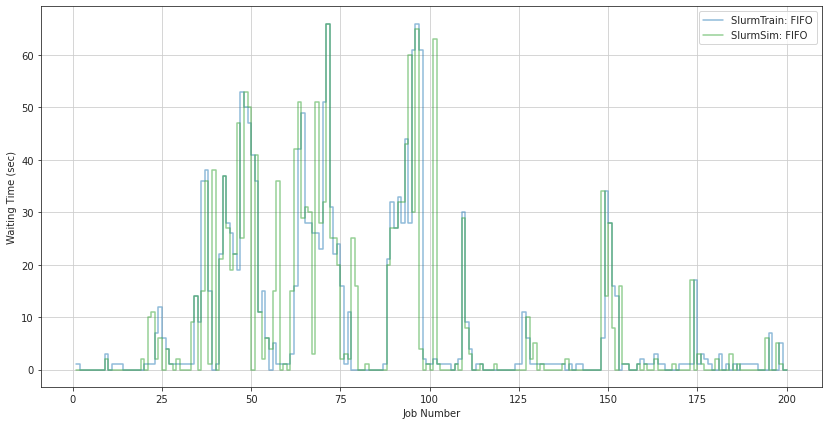

In [85]:
# n = 200

fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# runs=range(0,10)
run = 3
j = run-1
st_acct = dic_st_fifo_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
st_acct['job_name'] = st_acct['JobName'].astype(int)
st_acct['RunType'] = 'slurmtrain'
st_acct['SchedType'] = 'BF'

ssim_acct = dic_ss_fifo_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
ssim_acct['job_name'] = st_acct['JobName'].astype(int)
ssim_acct['RunType'] = 'slurmsim'
ssim_acct['SchedType'] = 'BF'

compare_wait = pd.merge(left=st_acct, 
                        right=ssim_acct, 
                        how="inner",
                        on="job_name",
                        suffixes = ("_st", "_ssim")
                        )

compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1


# Plot
ax.step(compare_wait['Job Number'], 
    compare_wait.wait_time_st,
    where='post',
    label = f"SlurmTrain: FIFO",
    alpha=.5)

# Plot 
ax.step(compare_wait['Job Number'], 
    compare_wait.wait_time_ssim,
    where='post',
    label = f"SlurmSim: FIFO",
    alpha=.5,
    c="#2ca02c")
    
ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Waiting Time (sec)')

myrun_models = f"{myrun_type}_ssim_wait_step_plot_run{run}"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

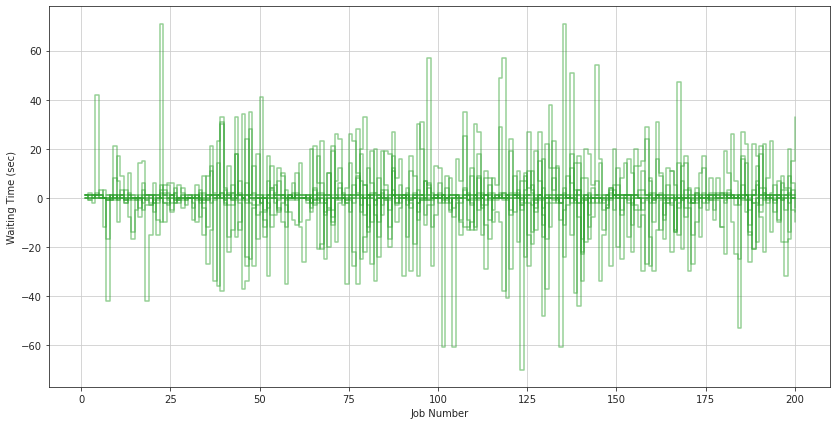

In [93]:
fig, ax = plt.subplots(figsize=[14,7])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

runs=range(0,10)

for j in runs:
    st_acct = dic_st_fifo_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'FIFO'

    ssim_acct = dic_ss_fifo_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    ssim_acct['job_name'] = st_acct['JobName'].astype(int)
    ssim_acct['RunType'] = 'slurmsim'
    ssim_acct['SchedType'] = 'FIFO'

    compare_wait = pd.merge(left=st_acct, 
                            right=ssim_acct, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_st", "_ssim")
                            )

    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1

    
    # Plot
    ax.step(compare_wait['Job Number'], 
        compare_wait.wait_time_st - compare_wait.wait_time_ssim,
        where='post',
        label = f"Jitter: SlurmTrain - SimPE",
        c="#2ca02c",
        alpha=.5,
        )
    
# ax.legend()
ax.set_xlabel('Job Number')
# ax.set_ylabel(r'PE Available / Max PE')
ax.set_ylabel('Waiting Time (sec)')

myrun_models = f"{myrun_type}_ssim_wait_jitter_plot"
pltpath = f'{save_image_path}/{myrun_shortname}_{myrun_models}.png'

plt.savefig(pltpath, facecolor='w', transparent=False)

plt.show()

In [73]:
# WHAT YOU WANT TO SHOW IS THE IMPROVEMENT ABOBE THE FIFO VERSION!!!!

In [74]:
###

### Jitter Wait Delta: histogram

In [75]:
runs=range(0,10)

list_compare_wait = []

for j in runs:
    st_acct = dic_st_fifo_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    st_acct['job_name'] = st_acct['JobName'].astype(int)
    st_acct['RunType'] = 'slurmtrain'
    st_acct['SchedType'] = 'FIFO'

    ssim_jobs = dic_ss_fifo_sacct[j].loc[:, ['JobName', 'wait_time']].copy()
    ssim_jobs['job_name'] = ssim_jobs['JobName'].astype(int)
    ssim_jobs['RunType'] = 'slurmsim'
    ssim_jobs['SchedType'] = 'FIFO'

    compare_wait = pd.merge(left=st_acct, 
                            right=ssim_jobs, 
                            how="inner",
                            on="job_name",
                            suffixes = ("_st", "_ssim")
                            )
    
    compare_wait['Job Number'] = compare_wait.job_name - 1000 + 1
    compare_wait['run_num'] = j+1
    
    compare_wait['delta_wait'] = compare_wait.wait_time_st - compare_wait.wait_time_ssim
  
    list_compare_wait.append(compare_wait)

#     # Plot
#     ax.step(compare_wait['Job Number'], 
#         compare_wait.wait_time_st - compare_wait.wait_time_sala,
#         where='post',
#         label = f"Jitter: SlurmTrain - SimPE",
#         c='g',
#         alpha=.5,
#         )

compare_wait_all = (pd.concat(list_compare_wait)
                    .reset_index(drop=True)
                    .loc[:, ["run_num", "SchedType_st", "Job Number","job_name", 
                             "wait_time_st", "wait_time_ssim", "delta_wait"]]
                   )

In [76]:
# # RECORD OF DIFFERENT WAYS TO PLOT HISTOGRAM

# j = 0
# x = list_compare_wait[j].delta_wait
    
# # sns.histplot(list_compare_wait[j].delta_wait)
# # plt.hist(x, density=True)

# counts, bins = np.histogram(x)
# plt.bar(bins[:-1], counts, width=(bins[1]-bins[0]))
# hist(x, bins='knuth', density=True)

# # n, bins, patches = hist(x, bins="knuth", density=True) # For continues x
# # showbins = np.round(bins, 1)

# # n, bins, patches = hist(x, density=True) # For discrete x
# # showbins = bins.astype(int)

# # # centre labels
# # n_bins =len(bins)-1
# # ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
# # ticklabels = [showbins[i] for i in range(n_bins)]
# # plt.xticks(ticks, ticklabels)

# plt.title(f"Run {j+1}")
# plt.show()

In [77]:
from astropy.visualization import hist

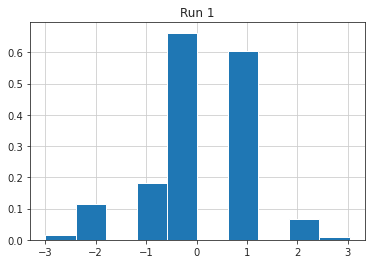

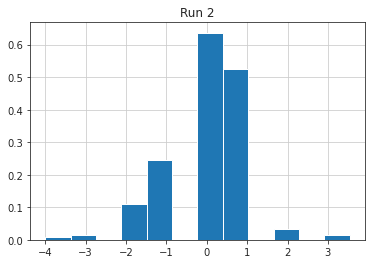

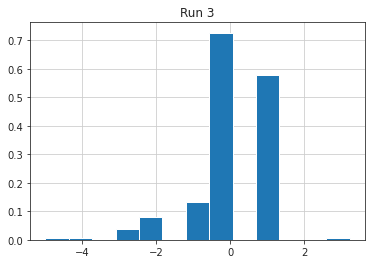

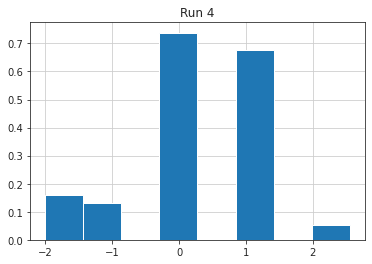

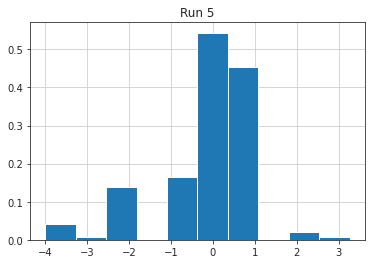

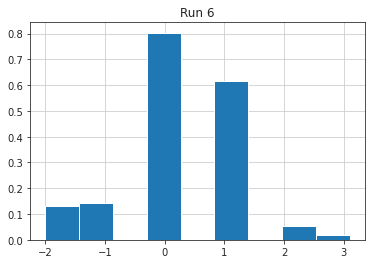

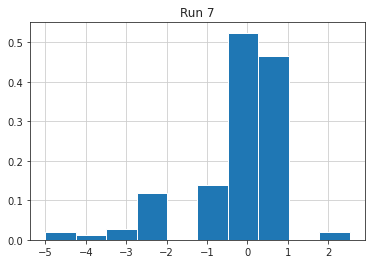

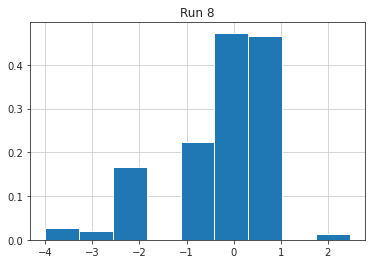

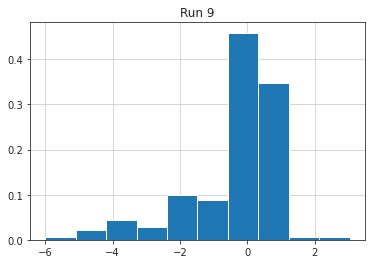

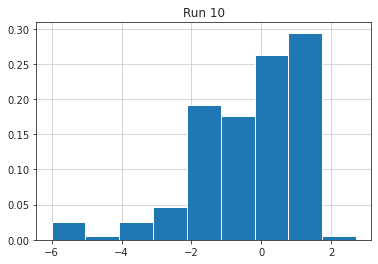

In [78]:
# Plot histogram
for j in range(10):

    x = list_compare_wait[j].delta_wait
    
    # sns.histplot(list_compare_wait[j].delta_wait, stat = 'density')
    n, bins, patches = hist(x, bins='scott', density=True)
#     n, bins, patches = hist(x, bins='freedman', density=True)
#     hist(x, bins="knuth", density=True)
    
    plt.title(f"Run {j+1}")
    plt.show()

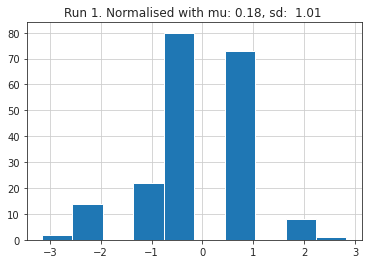

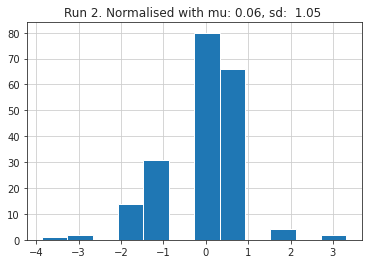

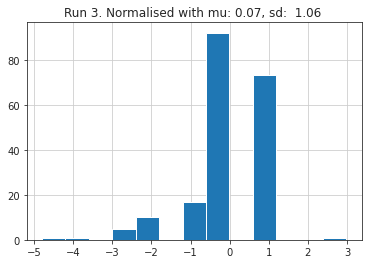

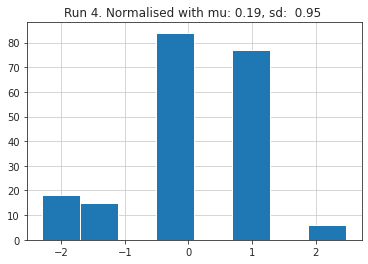

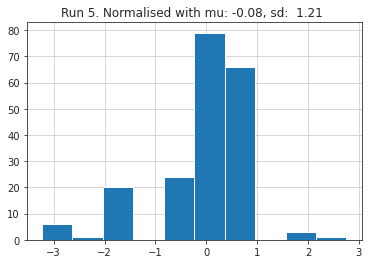

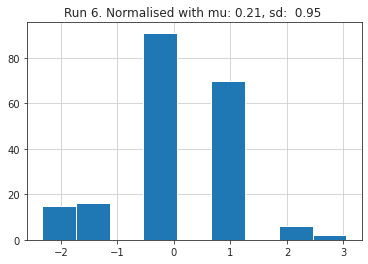

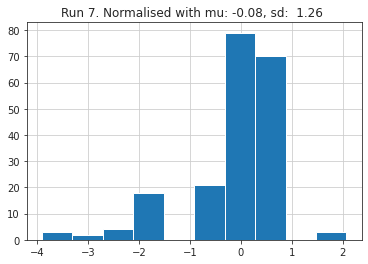

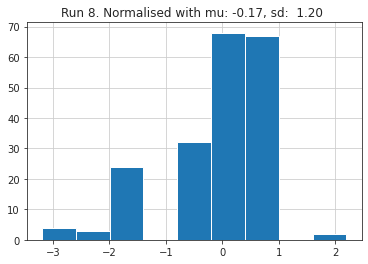

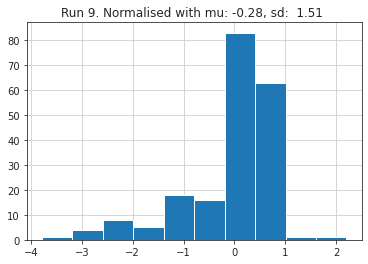

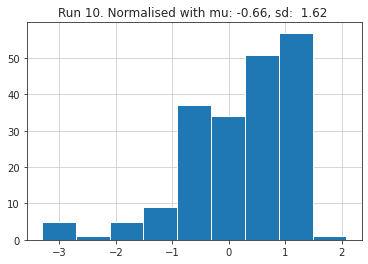

In [79]:
# # Plot normalised histogram
for j in range(10):
    x = list_compare_wait[j].delta_wait
    mu_x = np.mean(x)
    sd_x = np.nanstd(x)
    x_norm = (x - mu_x) / sd_x
    
#     sns.histplot(list_compare_wait[j].delta_wait, stat = 'density')
    n, bins, patches = hist(x_norm, bins='scott')
    
    plt.title(f"Run {j+1}. Normalised with mu: {mu_x:.2f}, sd: {sd_x: .2f} ")
    plt.show()

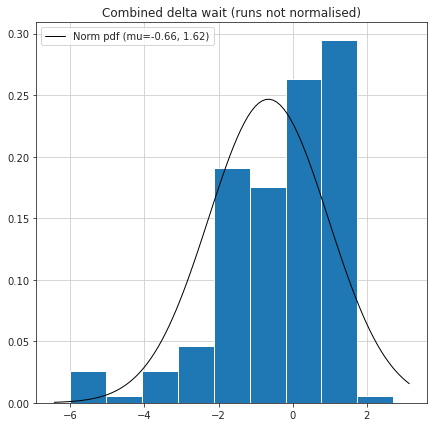

In [80]:
from scipy.stats import norm

# Plot normalised histogram
combined_x_norm = []
for j in range(10):
    x = list_compare_wait[j].delta_wait
    mu_x = np.mean(x)
    sd_x = np.nanstd(x)
    x_norm = (x - mu_x) / sd_x
    combined_x_norm = x
    
# Plot
fig, ax = plt.subplots(figsize=[7,7])
n, bins, patches = hist(combined_x_norm, bins='scott', density=True, ax = ax)

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(combined_x_norm) 

# Plot the PDF.
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, std)

plt.plot(x_axis, p, 'k', linewidth=1, label=f"Norm pdf (mu={mu:.2f}, {std:.2f})")

ax.legend()

plt.title(f"Combined delta wait (runs not normalised)")
plt.show()

### Waiting time

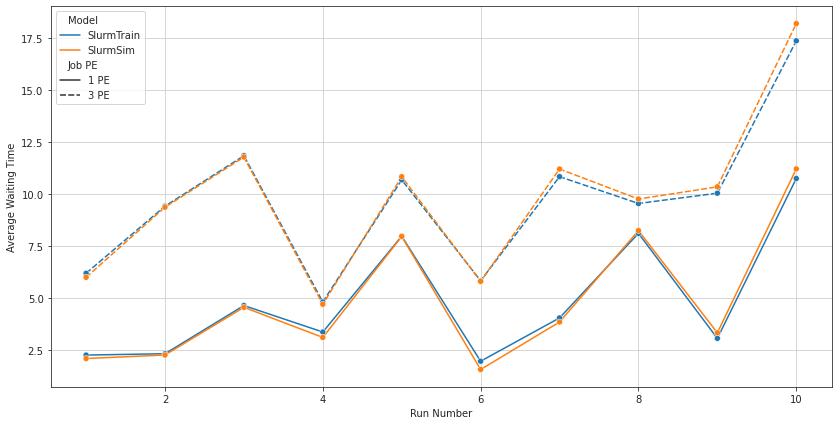

In [81]:
# Lets show this on one graph

fig, ax =plt.subplots(figsize=(14,7))

sns.set_style("ticks", {'axes.grid' : True})

p1 = sns.scatterplot(data=df_plot, 
                     x = "RunNum",
                     y = "wait_time_mean",
                     hue="Model",
                     ax = ax,
                     zorder = 10,
                     legend = None,
                     palette="tab10"
                     )

p2 = sns.lineplot(data=df_plot,
                  x = "RunNum",
                  y = "wait_time_mean",
                  hue = "Model",
                  style = "Job PE",
#                   style_order = (3,1),
                  ci = None,
                  palette="tab10",
                  ax = ax)

plt.xlabel("Run Number")
plt.ylabel("Average Waiting Time")

plt.show()

In [82]:
# TWO GRAPHS: 
# SLURMSIM VS SLURMTRAIN
# FIFO VS BF  -> wys backfills speed up 

NameError: name 'df_plot_no8' is not defined

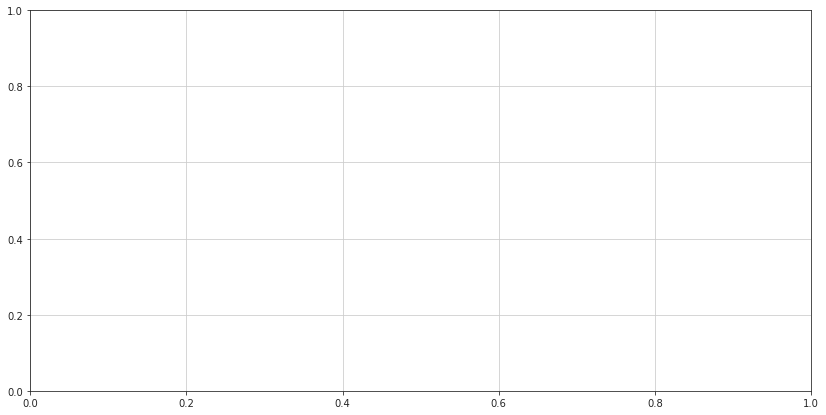

In [83]:
# No 8 version

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax =plt.subplots(figsize=(14,7))

sns.set_style("ticks", {'axes.grid' : True})

p1 = sns.scatterplot(data=df_plot_no8, 
                     x = "RunNum",
                     y = "wait_time_mean",
                     hue="Model",
                     ax = ax,
                     zorder = 10,
                     legend = None,
                     palette="tab10"
                     )

p2 = sns.lineplot(data=df_plot_no8,
                  x = "RunNum",
                  y = "wait_time_mean",
                  hue = "Model",
                  style = "Job PE",
#                   style_order = (3,1),
                  ci = None,
                  palette="tab10",
                  ax = ax)

plt.xlabel("Run Number")
plt.ylabel("Average Waiting Time")

plt.show()

In [ ]:
# IDEA FOR FOLLOW UP GRAPH :  actual running times of jobs vs expected times ... 

#### Volgende probeerslae

In [ ]:
# Plot the wait times over the 10 runs

import matplotlib.pyplot as plt
import seaborn as sns

# Set a grid layout
sns.set_style("ticks", {'axes.grid' : True})

g = sns.FacetGrid(df_plot, 
                  col="Job PE", 
                  hue="Model", 
                  height=7, 
                  aspect=1, 
                  palette="tab10")

# Draw line plot
g.map(sns.lineplot, "RunNum", "wait_time_mean")

# Draw scatter plots (dot plots) with circle markers
g.map(sns.scatterplot, "RunNum", "wait_time_mean", 
      s=100, 
      edgecolor=None, 
      marker="o")

# Add a legend
g.add_legend()

# Set plot title and labels
g.set_axis_labels("Run Number", "Average Waiting Time")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Difference in Average Waiting Time between SimPE and SlurmTrain for Backfill Jobs')

plt.show()

In [ ]:
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# from plotnine.data import mtcars

# (ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
#  + geom_point()
#  + stat_smooth(method="lm")
#  + facet_wrap("~gear"))

In [ ]:
# Plot the wait times over the 10 runs

import matplotlib.pyplot as plt
import seaborn as sns

# Set a grid layout
sns.set_style("ticks", {'axes.grid' : True})

g = sns.FacetGrid(df_plot, 
                  col="Job PE", 
                  hue="Model", 
                  height=7, 
                  aspect=1, 
                  palette="tab10")

# Draw line plot
g.map(sns.lineplot, "RunNum", "wait_time_mean")

# Draw scatter plots (dot plots) with circle markers
g.map(sns.scatterplot, "RunNum", "wait_time_mean", 
      s=100, 
      edgecolor=None, 
      marker="o")

# Add a legend
g.add_legend()

# Set plot title and labels
g.set_axis_labels("Run Number", "Average Waiting Time")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Difference in Average Waiting Time between SimPE and SlurmTrain for FIFO Jobs')

plt.show()

In [ ]:
sns.relplot(data = df_plot,
            x="RunNum",
            y="wait_time_mean",
#              col = "Job PE",
            size = "Job PE",
            sizes = (50,200),
            hue="Model",
            height=7,
            aspect=1,
            kind = "scatter"
            )

plt.show()

In [ ]:
# Create a scatter plot
plt.figure(figsize=(14, 7))

sns.set_style("ticks", {'axes.grid' : True})
sns.scatterplot(x="RunNum", 
                y="wait_time_mean", 
                hue="Model", 
                size="Job PE", 
                sizes=(50, 200), 
                data=df_plot, 
                palette="tab10", 
                edgecolor=None, marker="o")

# Set plot title and labels
plt.title('Average Waiting Time for Different Run Types over Runs')
plt.xlabel('Run Number')
plt.ylabel('Average Waiting Time')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [ ]:
# Create a scatter plot
plt.figure(figsize=(14, 7))

scatter = sns.scatterplot(x="RunNum", 
                          y="wait_time_mean", 
                          hue="Model", 
                          size="Job PE", 
                          sizes=(50, 200), 
                          data=df_plot, 
                          palette="tab10", 
                          edgecolor=None, 
                          marker="o")

# Set plot title and labels
plt.title('Average Waiting Time for Different Run Types over Runs')
plt.xlabel('Run Number')
plt.ylabel('Average Waiting Time')

# Handle the legend: split it into two parts
handles, labels = scatter.get_legend_handles_labels()

# Show legend for RunType
legend1 = plt.legend(handles=handles[1:3], labels=labels[1:3], title="RunType", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handletextpad=0.1)
plt.gca().add_artist(legend1)

# Show legend for job_pe_req
plt.legend(handles=handles[3:], labels=labels[3:], title="", bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0., handletextpad=0.1)

plt.show()

## Junk

In [ ]:
# rng = np.random.default_rng()
# rng

In [ ]:
# # T-test example

# rvs1 = stats.expon.rvs(loc=10,size=100,random_state=rng)
# rvs2 = (rvs1stats.expon.rvs(loc=10,size=100,random_state=rng)
#        )
#         # rvs1[1] = np.nan
# a = stats.ttest_rel(rvs1, rvs2)

# print(a.statistic)
# print(a.pvalue)

In [ ]:
# rvs1

In [ ]:
# rvs2

In [ ]:
# %run ./srun8_slurmtrain.ipynb